# Muhammad Ardian Saputra (DS)
# Practice Case : Ritz Jager Hotel

## A. Setup

### Import Package

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Display Setting

In [104]:
pd.set_option('display.max_columns', 32)
pd.set_option('display.max_colwidth',450)
sns.set(style="whitegrid")
%matplotlib inline

### Import Data

In [105]:
df = pd.read_csv('Ritz_Jager_Data.csv')
df_dict = pd.read_excel('data_dictionary_Ritz_Jager.xlsx')

## B. Data Observation & Cleaning

### Data Observation

In [106]:
df.head(4)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


In [107]:
df.tail(4)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [108]:
df.shape

(119390, 32)

There is 119390 rows and 32 columns.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

* We have a lot of features to analyze. The description of each feature can be seen in the data dictionary.
* There is some missing values in some columns.

In [110]:
df.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal_type                              0
country_origin                       488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Columns 'children', 'country_origin', 'agent', and 'company' have some missing values. We need to check those features.

In [111]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [112]:
df['meal_type'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

If we see the dictionary, 'SC' and 'Undefined' is one type. Undefined / SC = no meal package. So wee need to combine them by changing the 'Undefined' to 'SC'.

In [113]:
df['hotel_type'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

There 2 type of Hotel.

### Data Cleaning

**Replace Missing Values :**<br>
* **'children'**: We assume the null value in children means no children stay in the room, so we can replace it to 0.
* **'country_origin'**: We can replace this to Unknown.
* **'agent'**: If null then most likely the booking is done without an agent. So, we can replace it to 0.
* **'company'**: If null then most likely the booking is done personally. So, we can replace it to 0.

**We can create a dictionary to assigned the replacement value of each column.**

In [114]:
replace = {'children': 0.0,'country_origin': 'Unknown', 'agent': 0.0, 'company': 0.0}
df = df.fillna(replace)

In [115]:
df.isnull().sum()

hotel_type                        0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal_type                         0
country_origin                    0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

There is no missing value anymore.

**Because Meal Type 'SC' and 'Undefined' is one type. Undefined / SC = no meal package. So wee need to combine them by changing the 'Undefined' to 'SC'.**

In [116]:
df['meal_type'].replace('Undefined', 'SC', inplace=True)

In [117]:
df['meal_type'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

There is no Undefined anymore.

There are some data that no guest is present even if the booking is proceed. So we will dropt those data.

In [118]:
zero_guests = list(df[df["adults"] + df["children"] + df["babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)

In [119]:
df.shape

(119210, 32)

There are 119210 row left after the cleaning.

## C. EDA

In the EDA, I will seperate the analysis by hotel type that is **Resort Hotel** and **City Hotel**. This is because the two hotel have different characteristic. I will also **exclude the canceled booking** to know the actual number of visitors.

In [120]:
df_not_canceled = df[df['is_canceled']==0]

### 1. Where do the guests come from?

To answer this we need all the data regardles hotel type. But still excluding the canceled booking.

In [121]:
df_country = df_not_canceled['country_origin'].value_counts(normalize=True).rename_axis('country').reset_index(name='guest_%')
df_country['guest_%'] = round(df_country['guest_%']*100,2)
df_country 

,country,guest_%
0,PRT,27.97
1,GBR,12.89
2,FRA,11.29
3,ESP,8.51
4,DEU,8.09
...,...,...
161,ATF,0.00
162,NCL,0.00
163,SLE,0.00
164,KIR,0.00


In [182]:
px.choropleth(df_country,
              locations=df_country['country'],
              color=df_country['guest_%'], 
              hover_name=df_country['country'], 
              color_continuous_scale=px.colors.sequential.Inferno,
              title="Country origin of guests")

The costumer country of origin is so diverse, there is 166 countries in total. We can see the guests distribution by the country in the figure above. The white part means there are no data on that country.
We also can see that most of the guests comes from europe. With the top 3 country as following:
1. Portugal (PRT)       - 27.97%
2. United Kingdom (GBR) - 12.89%
3. France (FRA)         - 11.29%

### 2. How much do guests pay for a room per night?

There are many aspect that varies a price in the hotel. This two hotels have different room type and also meal type. Seasons and weather also an important factor.
There is no information about the currency, so we will just write the value.
The price given is excluding the canceled booking.

As there are no information about the room type description, like how many bed in each room type, so we will just calculate the average price without concerning the room and meal types per night per person.

So we need to normalize the adr by the number of guests staying in the room. We will exclude babies.

In [152]:
df_not_canceled['adr_per_person'] = df_not_canceled['adr'] / (df_not_canceled['adults'] + df_not_canceled['children'])

In [153]:
print('Without concerning the room and meal types, the average prices are:\nResort Hotel: {:.2f} per night per person.\nCity Hotel: {:.2f} per night per person.'.format(df_not_canceled.loc[df_not_canceled['hotel_type']=='Resort Hotel','adr_per_person'].mean(), df_not_canceled.loc[df_not_canceled['hotel_type']=='City Hotel','adr_per_person'].mean()))

Without concerning the room and meal types, the average prices are:
Resort Hotel: 47.49 per night per person.
City Hotel: 59.27 per night per person.


We can see that the city hotel have a higher average price per night and person than the resort hotel.

### 3. How does the price per night vary over the year?

I will be using the average prices per night without concerning the room and meal types.

In [154]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [155]:
room_prices_monthly = df_not_canceled[['hotel_type', 'arrival_date_month', 'adr_per_person']].sort_values('arrival_date_month')

In [156]:
df_not_canceled.loc[:,"arrival_date_month"] = pd.Categorical(df_not_canceled["arrival_date_month"], categories=ordered_months, ordered=True)

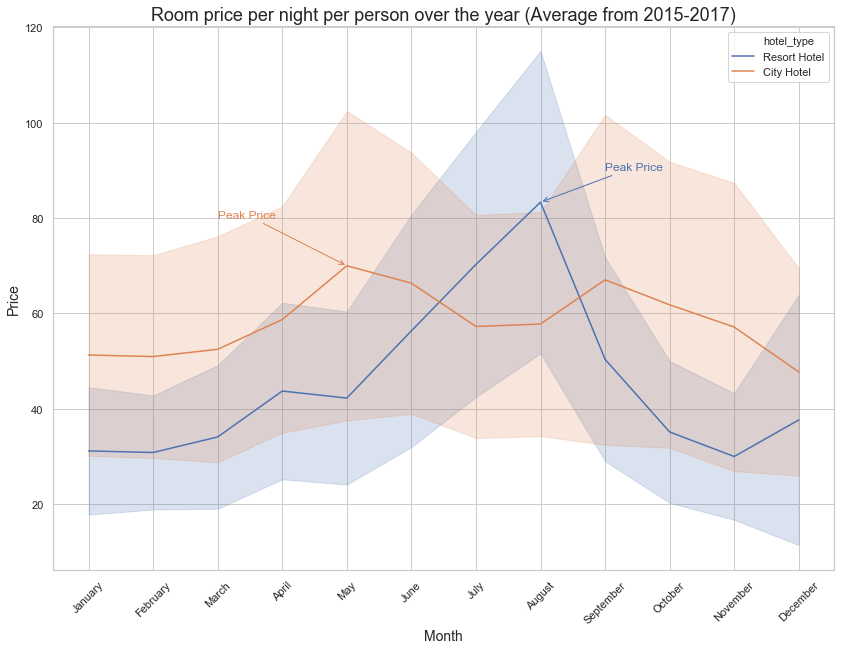

In [157]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='arrival_date_month',y='adr_per_person', data=df_not_canceled, hue='hotel_type',ci="sd");
plt.title("Room price per night per person over the year (Average from 2015-2017)", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=14);
plt.annotate('Peak Price',fontsize=12,xy=['August',83.322653],xytext=('September',90),arrowprops={'arrowstyle':'->','color':'C0'},color='C0');
plt.annotate('Peak Price',fontsize=12,xy=['May',69.987850],xytext=('March',80),arrowprops={'arrowstyle':'->','color':'C1'},color='C1');

The figure above is the average of price per night and person over the year with standard deviation as the confidence interval. We can see that city hotel price doesn't varies alot throughout the year with peak price in May and September comes second. The resort hotel price varies alot throughout the year, with price slowly rising from mid spring until end of summer with the peak price in August. There is no surprise that in August resort hotel have a very high price because it is their speciality and people comes to a resort in summer.

### 4. Which are the busiest months?

We will count the average number of customer by month.

In [158]:
# Count by hotel type and month of arrival
guests_by_month = df_not_canceled.groupby('hotel_type')['arrival_date_month'].value_counts().reset_index(name='guest_count')
guests_by_month["arrival_date_month"] = pd.Categorical(guests_by_month["arrival_date_month"], categories=ordered_months, ordered=True)

In [159]:
df_not_canceled[['arrival_date_month','arrival_date_year']]

,arrival_date_month,arrival_date_year
0,July,2015
1,July,2015
2,July,2015
3,July,2015
4,July,2015
...,...,...
119385,August,2017
119386,August,2017
119387,August,2017
119388,August,2017


We can see that the data start from July 2015 until August 2017. So we have July and August data for 3 years and the rest of the month for 2 years. So we need to normalize this.

In [160]:
guests_by_month.loc[(guests_by_month['arrival_date_month']=='July')|(guests_by_month['arrival_date_month']=='August'),'guest_count'] /= 3
guests_by_month.loc[~((guests_by_month['arrival_date_month']=='July')|(guests_by_month['arrival_date_month']=='August')),'guest_count'] /= 2

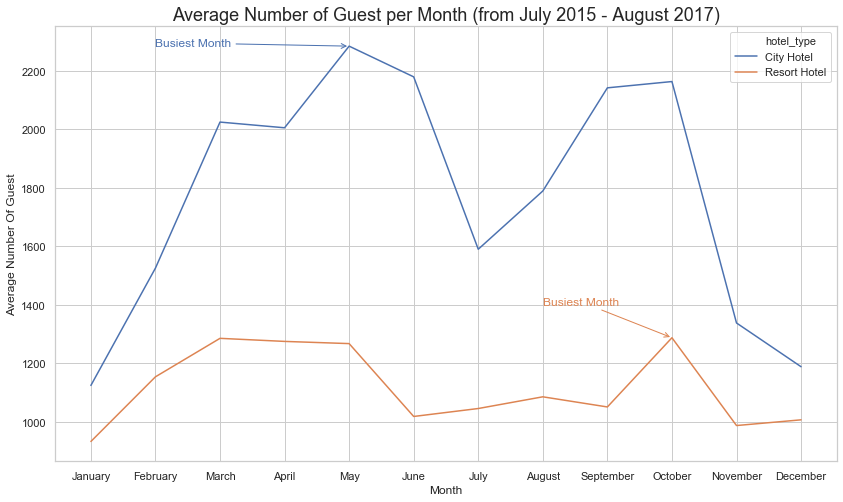

In [161]:
plt.figure(figsize=(14, 8))
sns.lineplot(x = "arrival_date_month", y="guest_count", hue='hotel_type', data=guests_by_month);
plt.annotate('Busiest Month',fontsize=12,xy=['October',1287.5],xytext=('August',1400),arrowprops={'arrowstyle':'->','color':'C1'},color='C1');
plt.annotate('Busiest Month',fontsize=12,xy=['May',2284.0],xytext=('February',2284.0),arrowprops={'arrowstyle':'->','color':'C0'},color='C0');
plt.title('Average Number of Guest per Month (from July 2015 - August 2017)',fontsize=18);
plt.xlabel('Month');
plt.ylabel('Average Number Of Guest');

In general city hotel have more guest than the resort hotel. We can see that in May and September, city hotel have the most number of guests compares to the other month. It could be one of the reason why the price in May and September is higher. For resort hotel, surprisingly the busiest month is October. We expected it to be in summer. But in some country, the sun is still shining and the weather is still warm in October. As we don't know the location of this hotel, so it might be possible.

### 5. How long do people stay at the hotels?

In [162]:
df_not_canceled['total_stay'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']

In [163]:
avg_resort = round(df_not_canceled.loc[df_not_canceled['hotel_type']=='Resort Hotel','total_stay'].mean(),2)
avg_city = round(df_not_canceled.loc[df_not_canceled['hotel_type']=='City Hotel','total_stay'].mean(),2)

In [164]:
print('In Resort Hotel, the guest stays {} nights on average.\nIn City Hotel, the guest stays {} nights on average.'.format(avg_resort,avg_city))

In Resort Hotel, the guest stays 4.14 nights on average.
In City Hotel, the guest stays 2.92 nights on average.


We can see that people stays longer in resort. It is because resort have a specific purpose for holidays and people stay longer for holiday. As for the city hotel, it has a general purpose.

### 6. Bookings by market segment

To answer this, we will use the dataframe that includes the canceled booking. Because we will count the number of booking so it doesn't matter whether the booking is canceled or not. 

In [165]:
market_count = df['market_segment'].value_counts()

In [166]:
market_count_by_hotel = df.groupby('hotel_type')['market_segment'].value_counts().reset_index(name='count')

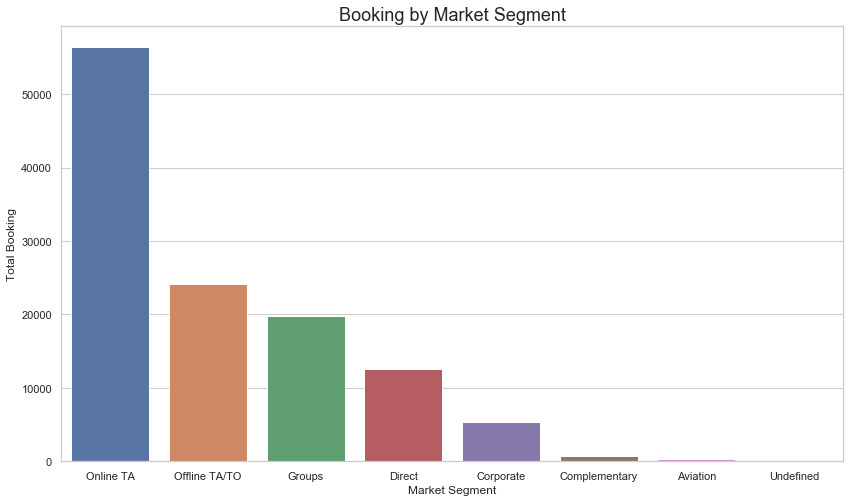

In [167]:
plt.figure(figsize=(14,8))
sns.barplot(market_count.index,market_count);
plt.title('Booking by Market Segment',fontsize=18);
plt.xlabel('Market Segment');
plt.ylabel('Total Booking');

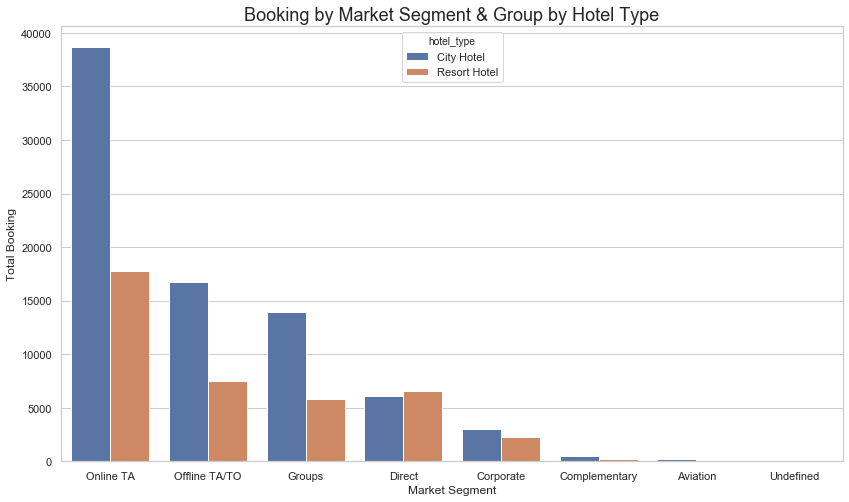

In [168]:
plt.figure(figsize=(14,8))
sns.barplot(x='market_segment',y='count',hue='hotel_type',data=market_count_by_hotel);
plt.title('Booking by Market Segment & Group by Hotel Type',fontsize=18);
plt.xlabel('Market Segment');
plt.ylabel('Total Booking');

We can see that either as general or group by hotel type, online TA has the highest booking and aviation has the lowest.

### 7. How many bookings were canceled?

To answer this, we will use the dataframe that includes the canceled booking.

In [169]:
canceled = df['is_canceled'].value_counts()
canceled_by_hotel = df.groupby('hotel_type')['is_canceled'].value_counts().reset_index(name='count')

In [170]:
canceled_pct = canceled[1]/df.shape[0]*100
resort_canceled_pct = canceled_by_hotel.loc[3,'count']/df[df['hotel_type']=='Resort Hotel'].shape[0]*100
city_canceled_pct = canceled_by_hotel.loc[1,'count']/df[df['hotel_type']=='City Hotel'].shape[0]*100

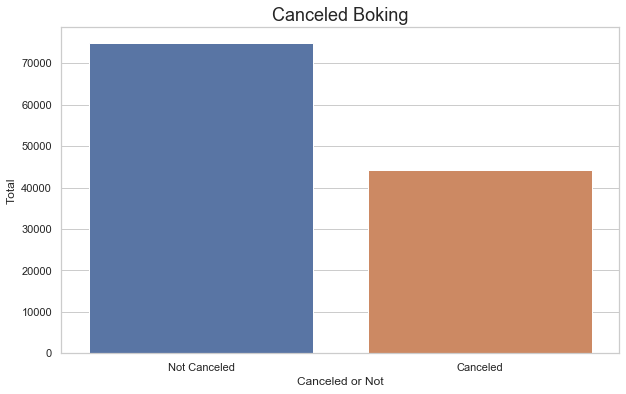

In [171]:
plt.figure(figsize=(10,6))
sns.barplot(['Not Canceled','Canceled'],canceled);
plt.title('Canceled Boking',fontsize=18);
plt.xlabel('Canceled or Not');
plt.ylabel('Total');

In [172]:
print('The total canceled booking in all hotel is {} ({:.2f} %).'.format(canceled[1],canceled_pct))

The total canceled booking in all hotel is 44199 (37.08 %).


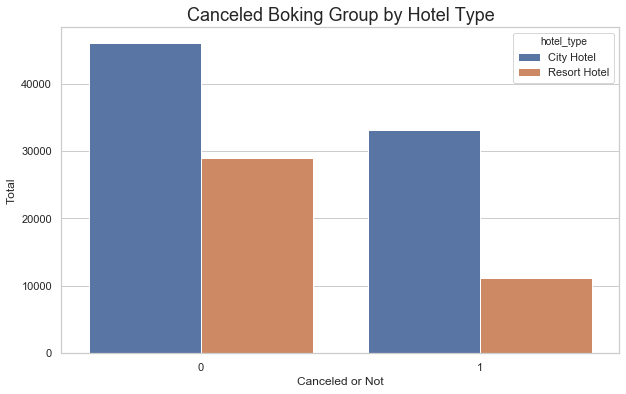

In [173]:
plt.figure(figsize=(10,6))
sns.barplot(x='is_canceled',y='count',hue='hotel_type',data=canceled_by_hotel);
plt.title('Canceled Boking Group by Hotel Type',fontsize=18);
plt.xlabel('Canceled or Not');
plt.ylabel('Total');

In [174]:
print('The total canceled booking in Resort Hotel is {} ({:.2f} %).'.format(canceled_by_hotel.loc[3,'count'],resort_canceled_pct))
print('The total canceled booking in City Hotel is {} ({:.2f} %).'.format(canceled_by_hotel.loc[1,'count'],city_canceled_pct))

The total canceled booking in Resort Hotel is 11120 (27.77 %).
The total canceled booking in City Hotel is 33079 (41.79 %).


In general, the cancelation percentage is quite high with 37.08 %. City Hotel contribute the highest cancelation. So when calculating a future revenue from existing reservations this should be considered.

### 8. Which month has the highest number of cancellations?

In [175]:
df_canceled = df[df['is_canceled']==1]

In [176]:
canceled_all = df_canceled['arrival_date_month'].value_counts().rename_axis('month').reset_index(name='cancel_count')
canceled_all['month'] = pd.Categorical(canceled_all['month'], categories=ordered_months, ordered=True)

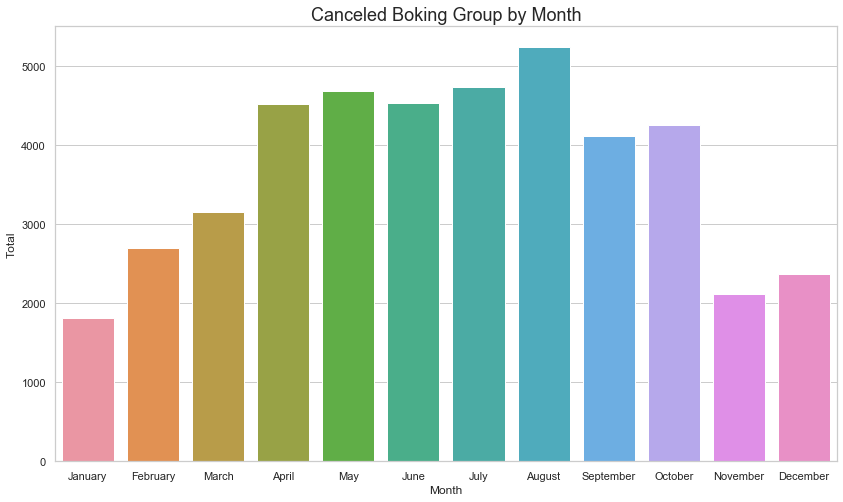

In [177]:
plt.figure(figsize=(14, 8))
sns.barplot(x = "month", y="cancel_count",data=canceled_all);
plt.title('Canceled Boking Group by Month',fontsize=18);
plt.xlabel('Month');
plt.ylabel('Total');

In [178]:
canceled_by_hotel = df_canceled.groupby(['hotel_type','arrival_date_month'])['is_canceled'].sum().reset_index(name='cancel_count')
canceled_by_hotel['arrival_date_month'] = pd.Categorical(canceled_by_hotel['arrival_date_month'], categories=ordered_months, ordered=True)

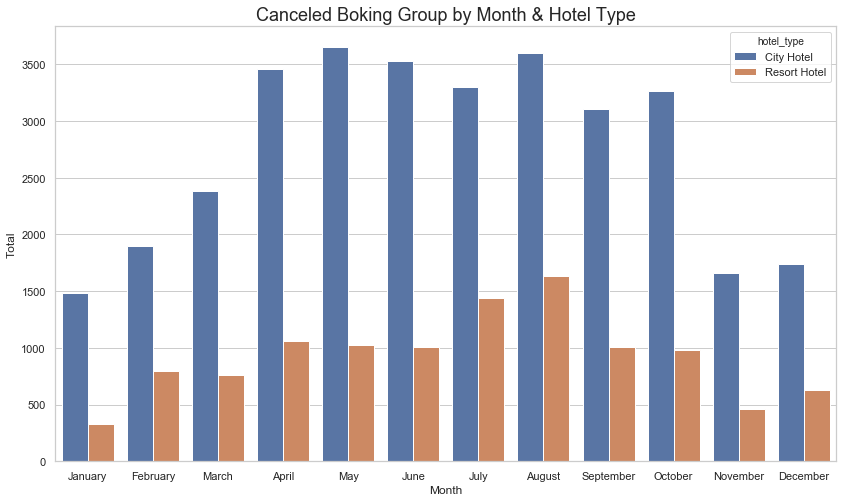

In [179]:
plt.figure(figsize=(14, 8))
sns.barplot(x ='arrival_date_month', y='cancel_count',hue='hotel_type',data=canceled_by_hotel);
plt.title('Canceled Boking Group by Month & Hotel Type',fontsize=18);
plt.xlabel('Month');
plt.ylabel('Total');

* In general, August has the highest number of cancellations.
* In City Hotel, May has the highest number of cancellations.
* In Resort Hotel, August has the highest number of cancellations

## D. Conclusion

There is alot of missing and inconsistency in the data. Because of that we do data cleansing in this analysis. After the cleansing process, the data is ready to use. After doing exploratory data analysis there are few points that we get :
* The guests comes from 166 countries in total and most of the guests comes from europe.
* The average price for Resort Hotel and City Hotel are 47.49 and 59.27
* Peak price for City Hotel is in May and September. For Resort Hotel, it is in August.
* The busiest month for City Hotel is in May. For Resort Hotel, it is in October.
* The average stay for City Hotel is 2.92 nights. For resort Hotel, it is 4.14 nights.
* Either as general or group by hotel type, online TA has the highest booking and aviation has the lowest.
* The total canceled booking in all hotel is 44199 (37.08 %). The total canceled booking in Resort Hotel is 11120 (27.77 %).
  The total canceled booking in City Hotel is 33079 (41.79 %).
* In general, August has the highest number of cancellations. In City Hotel, May has the highest number of cancellations. In Resort Hotel, August has the highest number of cancellations